# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 621


In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 595


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
weather_api_key = "d3634471908f89905313b720f34e54d5"
url = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | papatowai
Processing Record 2 of Set 1 | la passe
Processing Record 3 of Set 1 | port-aux-francais
Processing Record 4 of Set 1 | bilibino
Processing Record 5 of Set 1 | grytviken
Processing Record 6 of Set 1 | majene
Processing Record 7 of Set 1 | jamestown
Processing Record 8 of Set 1 | constantia
Processing Record 9 of Set 1 | lebu
Processing Record 10 of Set 1 | puerto natales
Processing Record 11 of Set 1 | astrakhan
Processing Record 12 of Set 1 | blackmans bay
Processing Record 13 of Set 1 | waitangi
Processing Record 14 of Set 1 | hawaiian paradise park
Processing Record 15 of Set 1 | aasiaat
Processing Record 16 of Set 1 | nouadhibou
Processing Record 17 of Set 1 | carutapera
Processing Record 18 of Set 1 | iskateley
Processing Record 19 of Set 1 | qaqortoq
Processing Record 20 of Set 1 | hermanus
Processing Record 21 of Set 1 | broome
Processing Record 22 of Set 1 | saipan
Processing Re

In [7]:
# Convert the array of dictionaries to a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
#city_data_df.head(10)

# Extract relevant fields from the data frame
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

# Show Record Count
city_data_df.count()


City          573
Lat           573
Lng           573
Max Temp      573
Humidity      573
Cloudiness    573
Wind Speed    573
Country       573
Date          573
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,papatowai,-46.5619,169.4708,46.35,79,7,7.61,NZ,1690720407
1,la passe,45.5549,-0.8967,75.43,51,91,12.24,FR,1690720407
2,port-aux-francais,-49.3500,70.2167,34.99,68,49,35.61,TF,1690720407
3,bilibino,68.0546,166.4372,41.25,94,100,2.71,RU,1690720338
4,grytviken,-54.2811,-36.5092,34.41,99,98,9.98,GS,1690720407


In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,east london,-33.0153,27.9116,57.18,58,99,5.59,ZA,1686006453
1,grytviken,-54.2811,-36.5092,36.25,97,100,4.56,GS,1686006453
2,bredasdorp,-34.5322,20.0403,47.82,76,61,3.78,ZA,1686006453
3,nadi,-17.8000,177.4167,82.40,65,75,3.44,FJ,1686006454
4,kananga,-5.8958,22.4178,70.29,87,56,2.77,CD,1686006454


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

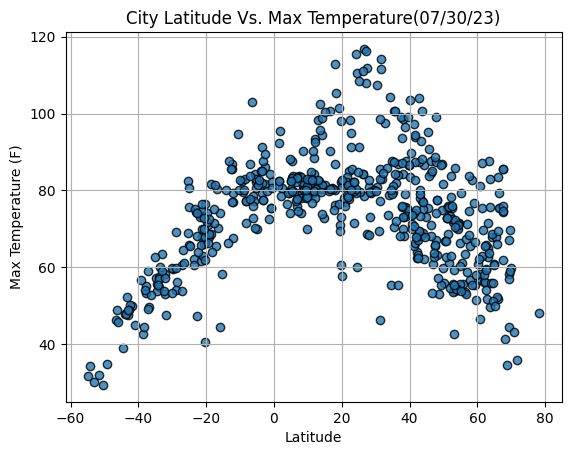

In [10]:
# Build scatter plot for latitude vs. temperature
plt.scatter(lats,
            max_temps,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Max Temperature(%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()



#### Latitude Vs. Humidity

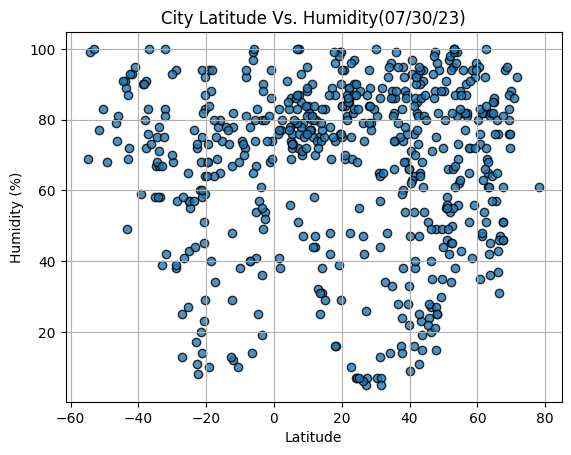

In [11]:
# Build scatter plot for latitude vs. Humidity
plt.scatter(lats,
            humidity,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")


# Incorporate the other graph properties
plt.title("City Latitude Vs. Humidity(%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)


# Save figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

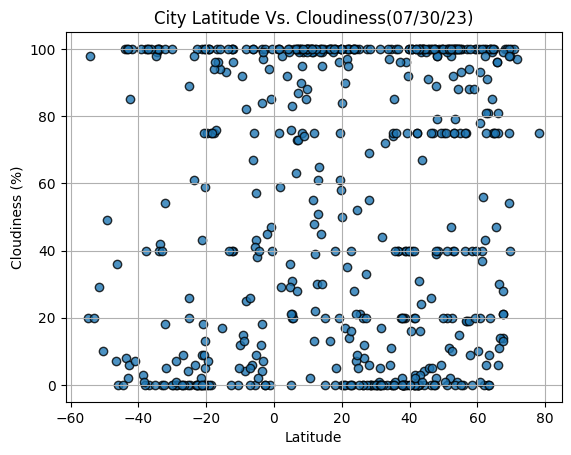

In [12]:
# Build scatter plot for latitude vs. Cloudiness
plt.scatter(lats,
            cloudiness,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")


# Incorporate the other graph properties
plt.title("City Latitude Vs. Cloudiness(%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)


# Save figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()



#### Latitude vs. Wind Speed Plot

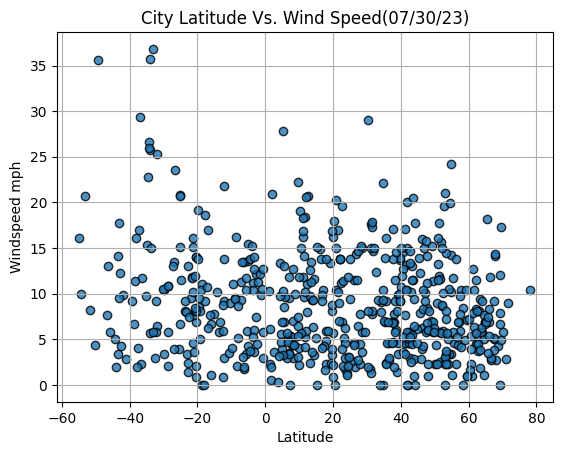

In [13]:
# Build scatter plot for latitude vs. Windspeed
plt.scatter(lats,
            wind_speed,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")


# Incorporate the other graph properties
plt.title("City Latitude Vs. Wind Speed(%s)" % time.strftime("%x"))
plt.ylabel("Windspeed mph")
plt.xlabel("Latitude")
plt.grid(True)


# Save figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()



---

## Requirement 2: Compute Linear Regression for Each Relationship


In [14]:
#Create a function to create Linear Regression plots
def plot_linear_regression(x_values,y_values,title,text_coordinates):
    
    # Run regression on Southern Hemisphere
    (slope, intercept, rvalue, pvalue, stderr) = linregress (x_values,y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))
    
    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq,text_coordinates, fontsize=15, color="red")
    plt.xlabel("Latitude")
    plt.ylabel("Title")
    print(f"The r-squared is: {rvalue}")
    plt.show()
    



In [16]:
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
5,gadzhiyevo,69.2551,33.3362,36.32,97,100,22.01,RU,1686006454
8,albany,42.6001,-73.9662,69.58,48,100,6.46,US,1686006265
11,holualoa,19.6228,-155.9522,78.55,74,40,10.36,US,1686006455
13,timmins,48.4669,-81.3331,64.22,39,75,11.50,CA,1686006325
15,ilulissat,69.2167,-51.1000,32.02,74,75,13.80,GL,1686006451


In [17]:
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,east london,-33.0153,27.9116,57.18,58,99,5.59,ZA,1686006453
1,grytviken,-54.2811,-36.5092,36.25,97,100,4.56,GS,1686006453
2,bredasdorp,-34.5322,20.0403,47.82,76,61,3.78,ZA,1686006453
3,nadi,-17.8000,177.4167,82.40,65,75,3.44,FJ,1686006454
4,kananga,-5.8958,22.4178,70.29,87,56,2.77,CD,1686006454


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: -0.7632542447288276


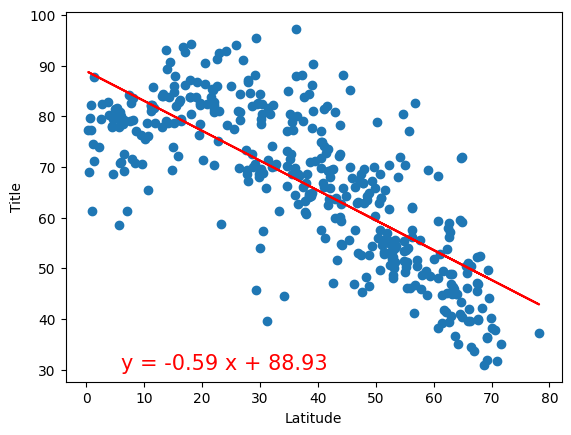

In [18]:
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Max Temp"]
plot_linear_regression(x_values,y_values, 'Max Temp', (6,30))

The r-squared is: 0.8340200773046257


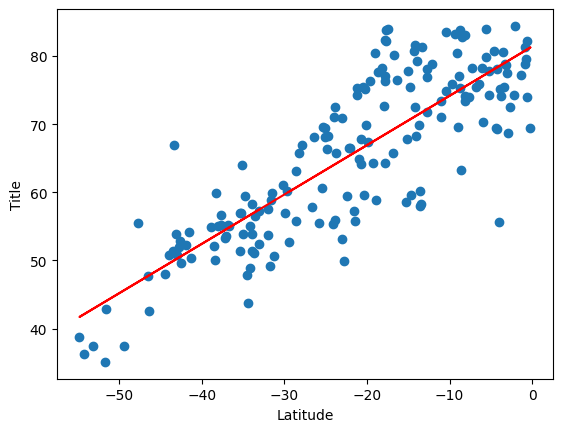

In [19]:
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Max Temp"]
plot_linear_regression(x_values,y_values, 'Max Temp', (6,30))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: -0.04936669568253384


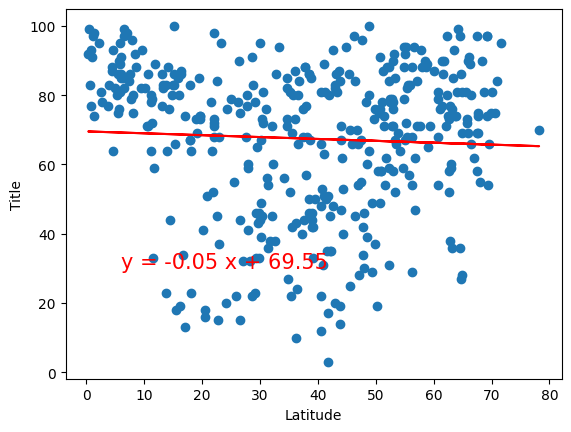

In [20]:
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Humidity"]
plot_linear_regression(x_values,y_values, 'Max Temp', (6,30))

The r-squared is: 0.05939005690724664


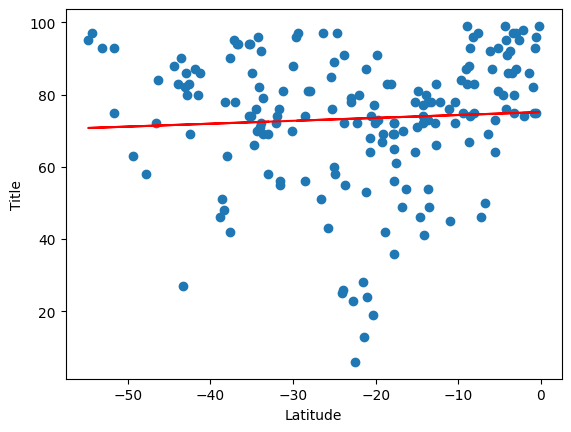

In [21]:
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Humidity"]
plot_linear_regression(x_values,y_values, 'Max Temp', (6,30))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: -0.06164450137092289


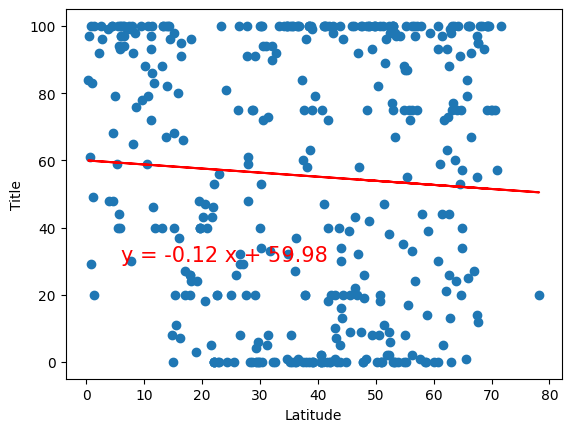

In [22]:
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Cloudiness"]
plot_linear_regression(x_values,y_values, 'Cloudiness', (6,30))

The r-squared is: -0.07711123328725393


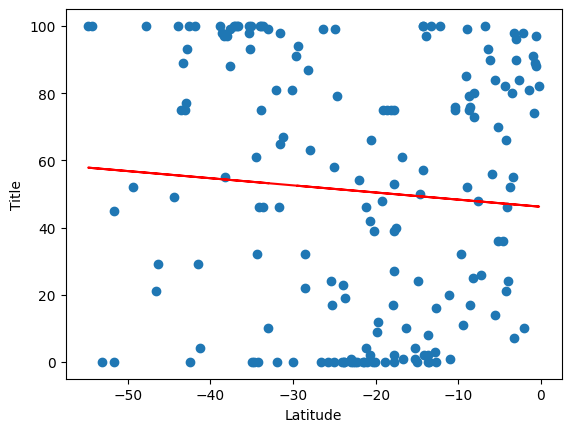

In [23]:
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Cloudiness"]
plot_linear_regression(x_values,y_values, 'Cloudiness', (6,30))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.02689550615870046


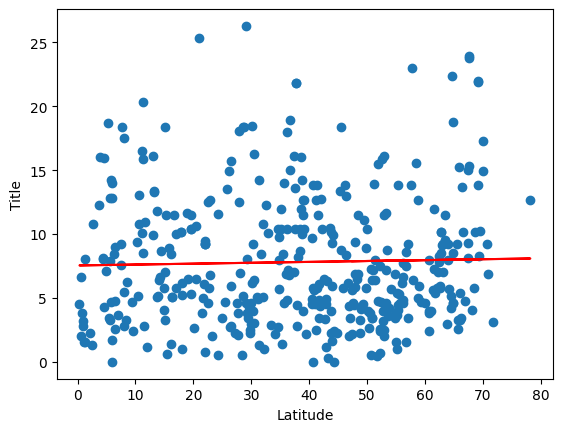

In [24]:
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Wind Speed"]
plot_linear_regression(x_values,y_values, 'Wind Speed', (6,30))

The r-squared is: -0.22001576760239233


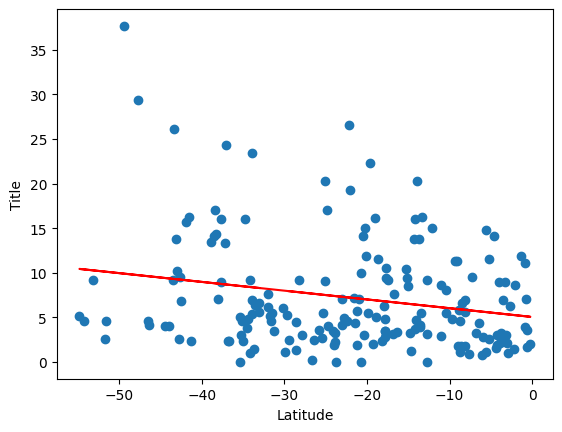

In [25]:
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Wind Speed"]
plot_linear_regression(x_values,y_values, 'Wind Speed', (6,30))

**Discussion about the linear relationship:** YOUR RESPONSE HERE